In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("Base.csv", sep=";", index_col=0)

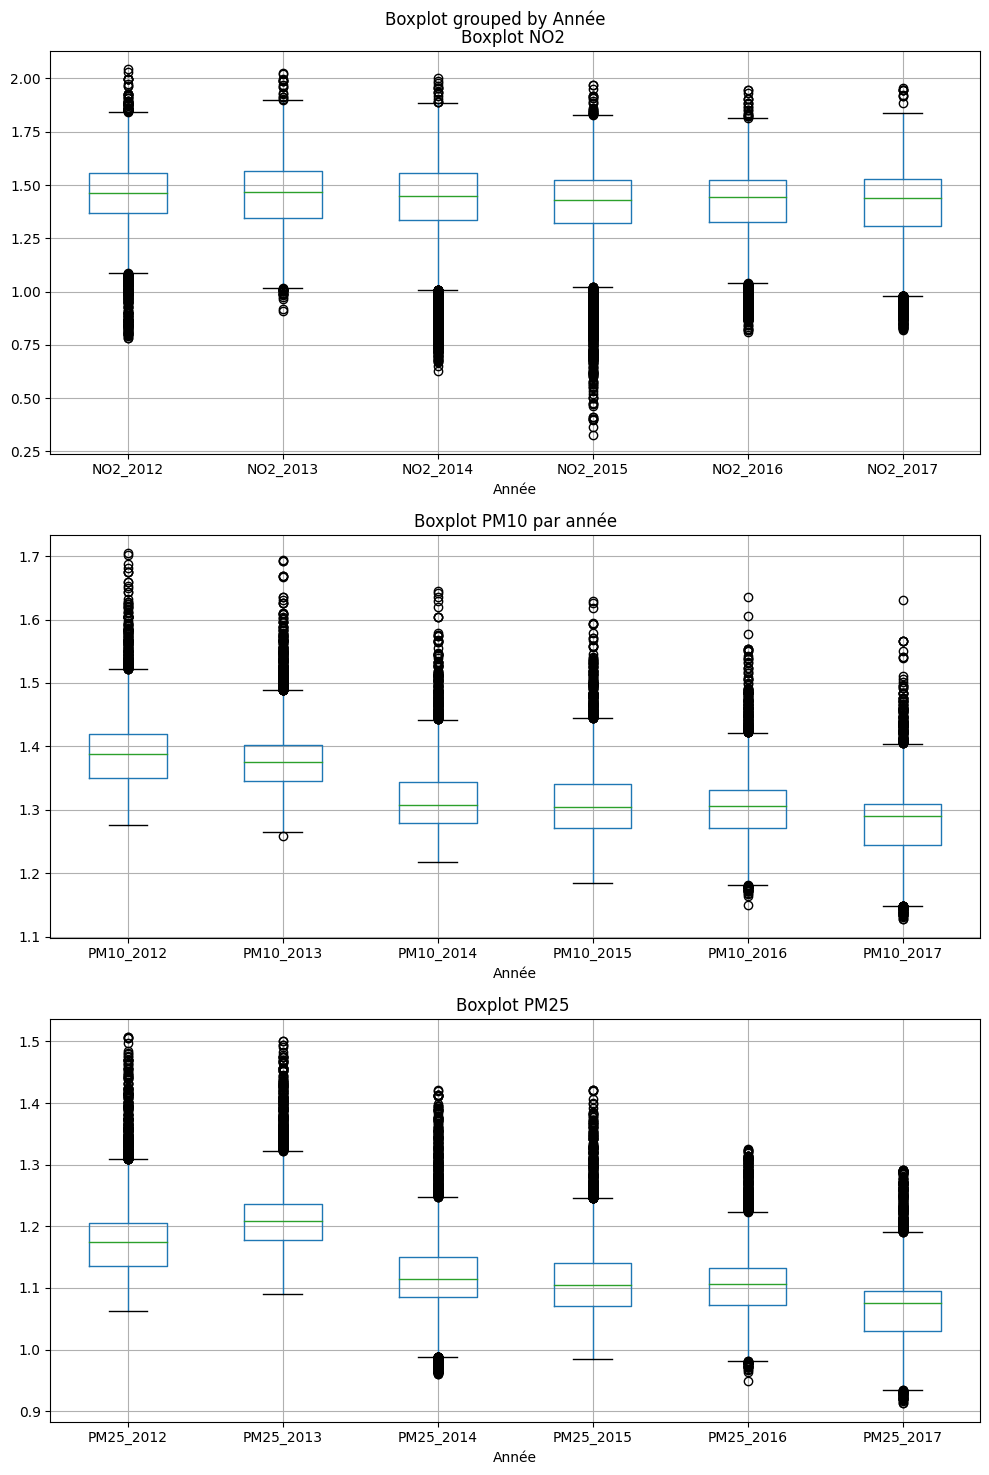

In [27]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("Base.csv", sep=";", index_col=0)
# Sélectionner les colonnes pertinentes
columns_NO2 = ['NO2_2012', 'NO2_2013', 'NO2_2014', 'NO2_2015', 'NO2_2016', 'NO2_2017']
columns_PM10 = ['PM10_2012', 'PM10_2013', 'PM10_2014', 'PM10_2015', 'PM10_2016', 'PM10_2017']
columns_PM25 = ['PM25_2012', 'PM25_2013', 'PM25_2014', 'PM25_2015', 'PM25_2016', 'PM25_2017']

# Appliquer un log10 sur les colonnes
df[columns_NO2] = np.log10(df[columns_NO2])
df[columns_PM10] = np.log10(df[columns_PM10])
df[columns_PM25] = np.log10(df[columns_PM25])



# Concaténer les colonnes pertinentes pour chaque groupe
df_NO2 = pd.concat([df['departement'], df[columns_NO2]], axis=1)
df_PM10 = pd.concat([df['departement'], df[columns_PM10]], axis=1)
df_PM25 = pd.concat([df['departement'], df[columns_PM25]], axis=1)

# Réarranger les données pour le boxplot
df_NO2_melted = df_NO2.melt(id_vars='departement', var_name='Année', value_name='NO2')
df_PM10_melted = df_PM10.melt(id_vars='departement', var_name='Année', value_name='PM10')
df_PM25_melted = df_PM25.melt(id_vars='departement', var_name='Année', value_name='PM25')


# Créer des sous-plots pour chaque variable
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Boxplot pour NO2
df_NO2_melted.boxplot(column='NO2', by='Année', ax=axes[0])
axes[0].set_title('Boxplot NO2 ')

# Boxplot pour PM10
df_PM10_melted.boxplot(column='PM10', by='Année', ax=axes[1])
axes[1].set_title('Boxplot PM10 par année')

# Boxplot pour PM25
df_PM25_melted.boxplot(column='PM25', by='Année', ax=axes[2])
axes[2].set_title('Boxplot PM25 ')

# Ajuster l'espacement entre les sous-plots
plt.tight_layout()

# Afficher les boxplots
plt.show()

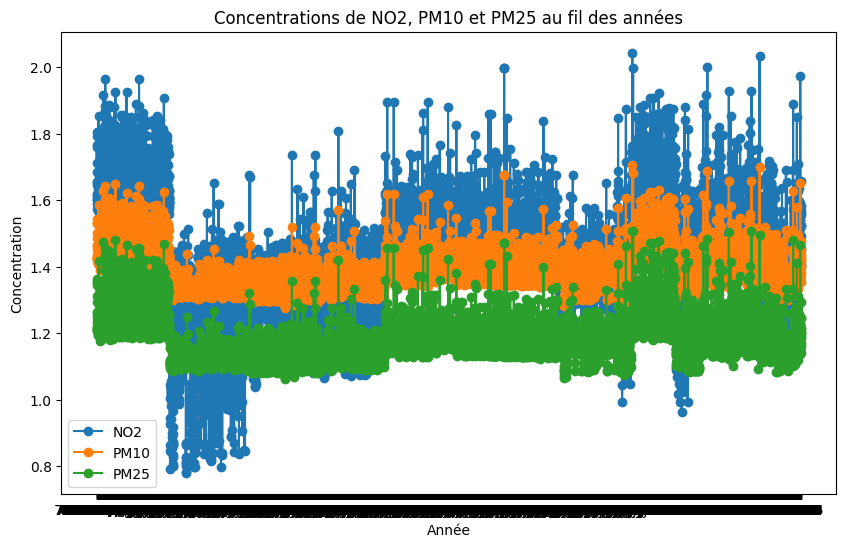

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


data = {'NO2': df[columns_NO2].values.tolist(),
        'PM10': df[columns_PM10].values.tolist(),
        'PM25': df[columns_PM25].values.tolist()}

df_new = pd.DataFrame(data, index=df.index)

# Aplatir les listes
df_new['NO2'] = df_new['NO2'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_new['PM10'] = df_new['PM10'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_new['PM25'] = df_new['PM25'].apply(lambda x: x[0] if isinstance(x, list) else x)



# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(df_new.index, df_new['NO2'], label='NO2', marker='o')
plt.plot(df_new.index, df_new['PM10'], label='PM10', marker='o')
plt.plot(df_new.index, df_new['PM25'], label='PM25', marker='o')

# Ajout de légendes et de titres
plt.legend()
plt.title('Concentrations de NO2, PM10 et PM25 au fil des années')
plt.xlabel('Année')
plt.ylabel('Concentration')

# Affichage du graphique
plt.show()


**Explcation **:


Nous disposons des listes dans nos colonnes plutôt que des valeurs individuelles. Ainsi nous avons aplatir nos colonnes avant de les utiliser dans le tracé.

Autremendts: dans ce code, j'utilise la méthode apply pour aplatir les listes dans chaque colonne.
Ce qui suppose que chaque que chaque liste contient une seule valeur.

Chaque ligne représente une série temporelle pour une des trois variables, avec les années sur l'axe des x et les concentrations sur l'axe des y. Les points marqués avec 'o' indiquent les valeurs spécifiques pour chaque année.

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
import branca.colormap as cm
from shapely.geometry import Point

df = pd.read_csv("Base.csv", sep=";", index_col=0)
df.head()

df['longitude'] = df['geometry'].apply(lambda x: float(x.split(',')[0].strip('c(')))
df['latitude'] = df['geometry'].apply(lambda x: float(x.split(',')[1].strip(')')))
df['geometry'] = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

gdf = gpd.GeoDataFrame(df, geometry='geometry')
quintiles = gdf['NO2_2017'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

colormap = cm.StepColormap(
    ['yellow', 'orange', 'red', 'darkred', 'black'],
    vmin=gdf['NO2_2017'].min(),
    vmax=gdf['NO2_2017'].max(),
    index=quintiles.values
)

carte = folium.Map(location=[48.8566, 2.3522], zoom_start=10)
for i, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=5,
        color='transparent',
        fill=True,
        fill_color=colormap(row['NO2_2017']),
        fill_opacity=0.7
    ).add_to(carte)

colormap.caption = 'NO2_2017'
carte.add_child(colormap)

carte

**Explication **

Le code commence par charger les données dans un dataframe. Ensuite, en extrayant les
informations de la colonne geometry, il sépare les coordonnées x et y pour chaque emplacement et
les organise dans deux listes distinctes représentant la latitude et la longitude. Ces coordonnées sont
regroupées dans un objet GeoDataFrame. En parallèle, en utilisant Folium, il crée une carte en
prenant, depuis le dataframe, les données sur la pollution au dioxyde d'azote (NO2_2017) et les
divise en cinq quantiles distincts. Enfin en se localisant sur la ville de Paris ([48.8566, 2.3522]), il
affiche des cercles de différentes couleurs pour chaque établissements scolaires d'Île-de-France pour
représenter le niveau de NO2 en 2017.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Base.csv", sep=";", index_col=0)

PM10_2012 = np.mean(df['PM10_2012'])
PM10_2013 = np.mean(df['PM10_2013'])
PM10_2014 = np.mean(df['PM10_2014'])
PM10_2015 = np.mean(df['PM10_2015'])
PM10_2016 = np.mean(df['PM10_2016'])
PM10_2017 = np.mean(df['PM10_2017'])

NO2_2012 = np.mean(df['NO2_2012'])
NO2_2013 = np.mean(df['NO2_2013'])
NO2_2014 = np.mean(df['NO2_2014'])
NO2_2015 = np.mean(df['NO2_2015'])
NO2_2016 = np.mean(df['NO2_2016'])
NO2_2017 = np.mean(df['NO2_2017'])

PM25_2012 = np.mean(df['PM25_2012'])
PM25_2013 = np.mean(df['PM25_2013'])
PM25_2014 = np.mean(df['PM25_2014'])
PM25_2015 = np.mean(df['PM25_2015'])
PM25_2016 = np.mean(df['PM25_2016'])
PM25_2017 = np.mean(df['PM25_2017'])

PM10moyenne = [PM10_2012, PM10_2013, PM10_2014, PM10_2015, PM10_2016, PM10_2017]
NO2moyenne = [NO2_2012, NO2_2013, NO2_2014, NO2_2015, NO2_2016, NO2_2017]
PM25moyenne = [PM25_2012, PM25_2013, PM25_2014, PM25_2015, PM25_2016, PM25_2017]

nombreval = len(PM10moyenne)
degresdangles = np.linspace(0, 2 * np.pi, nombreval, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 3)
ax.set_theta_direction(-1)

annee = ['2012', '2013', '2014', '2015', '2016', '2017']
ax.set_xticks(degresdangles)
ax.set_xticklabels(annee)

for pollutantmoy, label in zip([PM10moyenne, NO2moyenne, PM25moyenne], ['PM10', 'NO2', 'PM25']):
    moyenne = pollutantmoy
    ax.plot(degresdangles, moyenne, label=label)

ax.tick_params(axis='y', labelsize=7)
plt.title('Moyennes des niveaux de polluants par année (2012-2017)')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


**Explication : **

Le code commence par lire le jeu de données, calculant ensuite les moyennes annuelles des trois
polluants pour la période de 2012 à 2017. En utilisant la bibliothèque pyplot de Matplotlib
(plt.subplots), il crée un graphique de type radar, rendu polar grâce à la commande
« subplot_kw=dict(polar=True) », où chaque axe représente une année. Les moyennes des différents
polluants (PM10, NO2, PM25) sont tracées en fonction de ces années sur le graphique. De plus,
plt.legend est utilisé pour attribuer des étiquettes aux lignes, permettant ainsi d'identifier facilement
les différents polluants représentés.

<ipython-input-32-1a0f25829ef8>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('type')['NO2_2012', 'NO2_2013', 'NO2_2014', 'NO2_2015', 'NO2_2016',


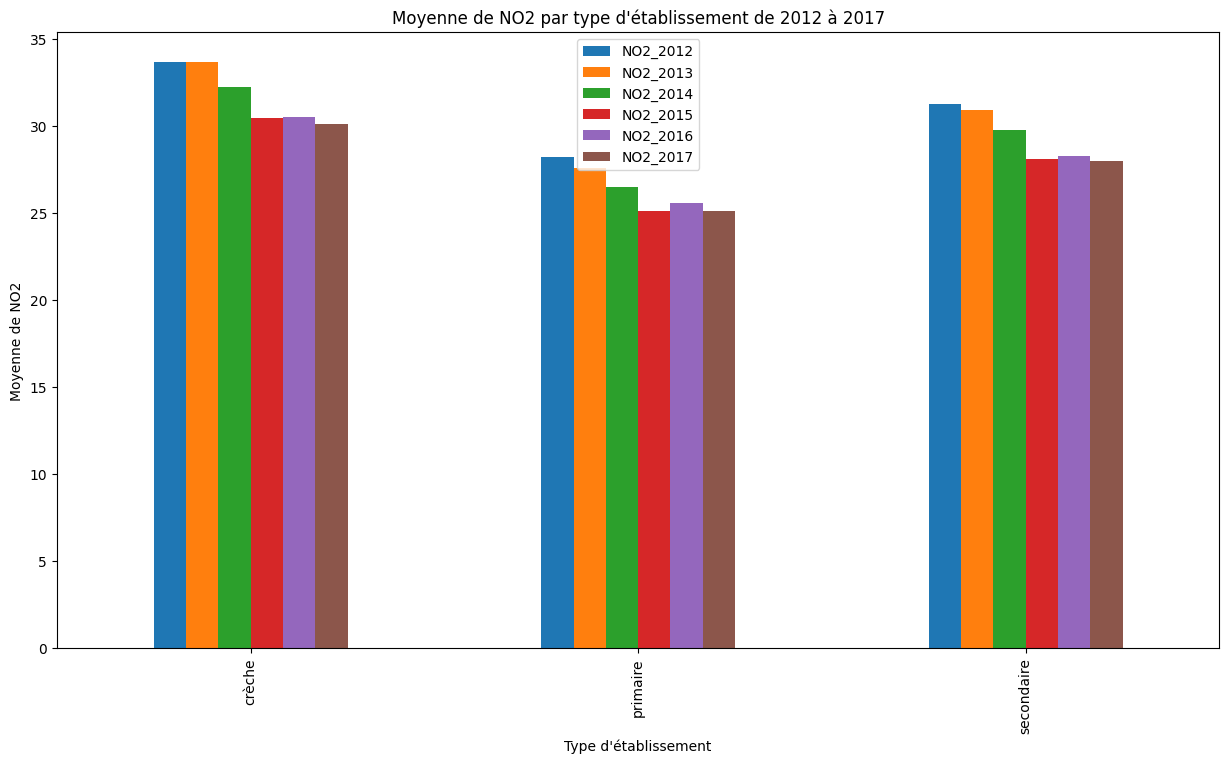

In [32]:

import matplotlib.pyplot as plt

df = pd.read_csv("Base.csv", sep=";", index_col=0)
df.groupby('type')['NO2_2012', 'NO2_2013', 'NO2_2014', 'NO2_2015', 'NO2_2016',
'NO2_2017'].mean().plot(kind='bar', figsize=(15, 8))
plt.xlabel('Type d\'établissement')
plt.ylabel('Moyenne de NO2')
plt.title('Moyenne de NO2 par type d\'établissement de 2012 à 2017')
plt.show()

**Explication:**

La première ligne : df.groupby('type')['NO2_2012', 'NO2_2013', 'NO2_2014', 'NO2_2015', 'NO2_2016', 'NO2_2017'].mean() : cette partie du code groupe les données en fonction de la colonne ‘type’(type de l’établissement) et elle calcule la moyenne des concentrations du polluant NO2 pour chaque année( du 2012 jusqu’à 2017),
le deuxième partie :  .plot(kind='bar', figsize=(15, 8))  utilise la fonction ‘plot’ de Pandas pour créer un diagramme à barres « kind=’bar’ » et figsize définit la taille de la figure en anglais .
Deuxième ligne : plt.xlabel('Type d\'établissement') : elle ajoute une étiquette à l’axe des abscisses x en spécifiant les types d’établissement « crèche, primaire, secondaire »
Troisième ligne : plt.ylabel('Moyenne de NO2') : elle ajoute une étiquette à l’axe des ordonnées y qui représente la moyenne de NO2.
Les dernières lignes : plt.title('Moyenne de NO2 par type d\'établissement de 2012 à 2017': Cette ligne ajoute un titre au diagramme à barres.
plt.show(): Cette ligne affiche le diagramme à barres.



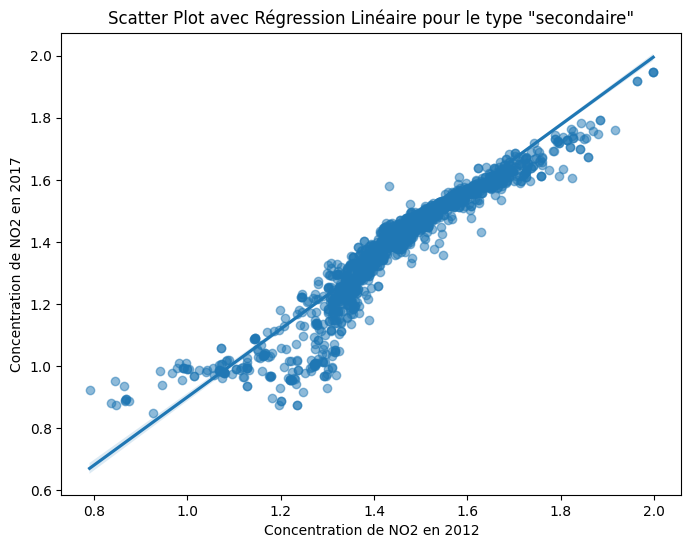

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

data_secondary = df[df['type'] == 'secondaire'][['NO2_2012', 'NO2_2017']]
data_secondary = data_secondary.dropna()
data_secondary.reset_index(drop=True, inplace=True)
plt.figure(figsize=(8, 6))
sns.regplot(x='NO2_2012', y='NO2_2017', data=data_secondary, scatter_kws={'alpha': 0.5})
plt.xlabel('Concentration de NO2 en 2012')
plt.ylabel('Concentration de NO2 en 2017')
plt.title('Scatter Plot avec Régression Linéaire pour le type "secondaire"')
plt.show()



**Explication :**

La première ligne : data_secondary = df[df['type'] == 'secondaire'][['NO2_2012', 'NO2_2017']] : cette ligne permet de sélectionner les données pour le type d’établissement « secondaire » pour les deux années : 2012 et 2017 pour cela un nouveau dataFrame était crée ‘data_secondary’
La deuxième ligne : data_secondary = data_secondary.dropna() : supprime leslignes qui contiennent des valeurs manquantes dans le data_secondary.
La troisième ligne : data_secondary.reset_index(drop=True, inplace=True) : réinitialise l’index du dataFrame après la suppression des valeurs manquantes et   drop=True evite de créer une nouvelle colonne.
La quatrième ligne : plt.figure(figsize=(8, 6)) : crée une nouvelle figure avec une taille spécifiée.
La cinquième ligne : sns.regplot(x='NO2_2012', y='NO2_2017', data=data_secondary, scatter_kws={'alpha': 0.5}) : permet de tracer un scatter plot avec une régression linéaire entre les concentrations de NO2 en 2012 et 2017, scatter_kws={'alpha': 0.5}) donne une meilleure visualisation des points.
Les dernières lignes : plt.xlabel('Concentration de NO2 en 2012') ,plt.ylabel('Concentration de NO2 en 2017'), plt.title('Scatter Plot avec Régression Linéaire pour le type "secondaire"') ajoute des étiquettes aux axes x et y et  un titre au graphique.
plt.show() : affiche le graphique.
